In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import warnings
warnings.filterwarnings("ignore")

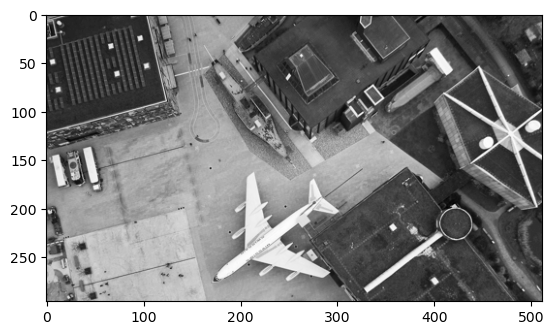

In [2]:
img_1 = plt.imread("IMG1.png")
plt.imshow(img_1,cmap="gray");

In [3]:
img_1.shape

(296, 512)

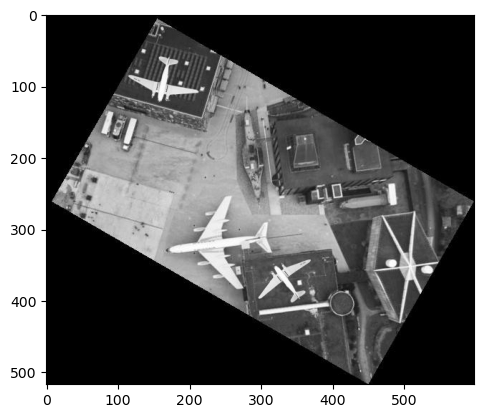

In [4]:
img_2 = plt.imread("IMG2.png")
plt.imshow(img_2,cmap="gray");

In [5]:
img_2.shape

(517, 598)

### For In-plane Rotation by $\theta$ and Translation by $T_x$ and $T_y$ using Homogenous Coordinate Transformation
**From Source to Target**<br><br>
$\begin{bmatrix} x_t \\ y_t \\ 1\end{bmatrix}$ = $\begin{bmatrix} Cos[\theta] & Sin[\theta] & T_x\\ -Sin[\theta] & Cos[\theta] & T_y \\ 0 & 0 & 1\end{bmatrix}$$\begin{bmatrix} x_s \\ y_s\\ 1\end{bmatrix}$ <br><br>
$x_t = x_s*Cos[\theta]+y_s*Sin[\theta]+T_x$ <br>
$y_t = -x_s*Sin[\theta]+y_s*Cos[\theta]+T_y$ <br>

**From Target to Source**<br><br>
$\begin{bmatrix} x_s \\ y_s \\ 1\end{bmatrix}$ = $\begin{bmatrix} Cos[\theta] & -Sin[\theta] & -T_x*Cos[\theta]+T_y*Sin[\theta]\\ Sin[\theta] & Cos[\theta] & -T_x*Sin[\theta]-T_y*Cos[\theta] \\ 0 & 0 & 1\end{bmatrix}$$\begin{bmatrix} x_t \\ y_t\\ 1\end{bmatrix}$ <br><br>
$x_s = x_t*Cos[\theta]-y_t*Sin[\theta]-T_x*Cos[\theta]+T_y*Sin[\theta]$ <br>
$y_s = x_t*Sin[\theta]+y_t*Cos[\theta]-T_x*Sin[\theta]-T_y*Cos[\theta]$ <br>


$P_{s1}$: (29, 124) --> $P_{t1}$: (93, 248) <br>
$P_{s2}$: (157, 372) --> $P_{t2}$: (328, 399) <br>

$93 = 29*Cos[\theta]+124*Sin[\theta]+T_x$   ---(1)<br>
$248 = -29*Sin[\theta]+124*Cos[\theta]+T_y$   ---(2)<br>
$328 = 157*Cos[\theta]+372*Sin[\theta]+T_x$   ---(3)<br>
$399 = -157*Sin[\theta]+372*Cos[\theta]+T_y$  ---(4)<br>

Eqn(3)-Eqn(1)<br>
$128*Cos[\theta]+248*Sin[\theta]=235$<br>
Eqn(4)-Eqn(2)<br>
$248*Cos[\theta]-128*Sin[\theta]=151$


In [6]:
St=(235*248-151*128)/(248**2+128**2)
Ct=(235*128+151*248)/(248**2+128**2)
print('Sin[theta] = {}\nCos[theta] = {}'.format(St,Ct))

Sin[theta] = 0.5001027115858668
Cos[theta] = 0.866988496302383


In [7]:
Tx = 93-29*Ct-124*St
Ty = 248+29*St-124*Ct
print('T_x = {}\nT_y = {}'.format(Tx,Ty))

T_x = 5.844597370583415
T_y = 154.99640509449466


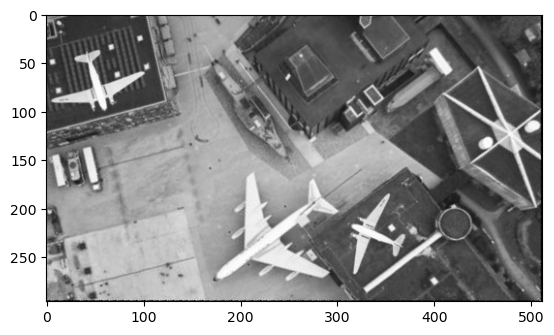

In [8]:
New_Image = np.zeros([int(img_1.shape[0]),int(img_1.shape[1])])
for row in range(New_Image.shape[0]):
        xt = row
        for col in range(New_Image.shape[1]):
            yt = col
            xs = xt*Ct+yt*St+Tx
            ys = -xt*St+yt*Ct+Ty
            if (xs>=0 and xs<img_2.shape[0] and ys>=0 and ys<img_2.shape[1]):
                a = xs - int(xs) 
                b = ys - int(ys)
                
                x_left = int(xs)
                if(x_left<img_2.shape[0]-1):
                    x_right = int(xs) +1
                else:
                    x_right = x_left
                y_top = int(ys)
                if(y_top<img_2.shape[1]-1):
                    y_bottom = y_top +1
                else:
                    y_bottom = y_top
                New_Image[row][col] = (1-a)*(1-b)*img_2[x_left][y_top]
                #if (x_right<img_2.shape[0]):
                New_Image[row][col] = New_Image[row][col] + a*(1-b)*img_2[x_right][y_top]
                #if (y_bottom<img_2.shape[1]):
                #print(y_bottom)
                New_Image[row][col] = New_Image[row][col] + (1-a)*b*img_2[x_left][y_bottom]
                #if (x_right<img_2.shape[0] and y_bottom-1<img_2.shape[0]):
                New_Image[row][col] = New_Image[row][col] + a*b*img_2[x_right][y_bottom]
plt.imshow(New_Image,cmap="gray");

## Changes in IMG2 with respect to IMG1

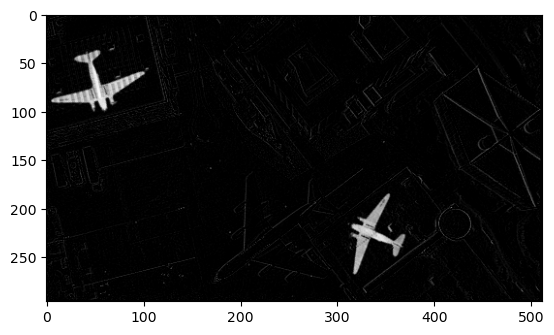

In [12]:
Diff_Img = np.clip(New_Image-img_1,0,255)
plt.imshow(Diff_Img,cmap="gray");

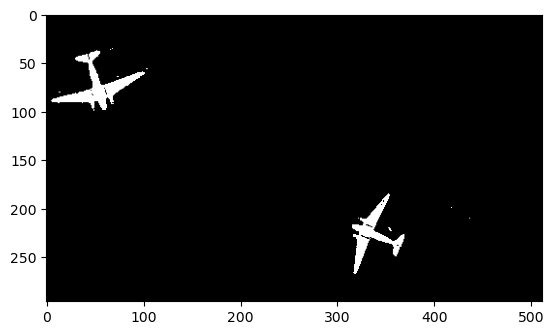

In [10]:
plt.imshow(Diff_Img>0.35,cmap="gray");